In [12]:
import xarray as xr
import pandas as pd

from pathlib import Path

from climate_index_collection.indices import southern_annular_mode
from climate_index_collection.data_loading import load_data_set

In [6]:
def index_to_dataframe(data_path="../data/test_data/", data_source_name="FOCI", index_function=southern_annular_mode):
    """Compute index from data source and convert xarray data array to Pandas dataframe.
    
    Parameters
    ----------
    data_path: str | path
        Location of the data files. Defaults to "data/test_data/".
    data_source_name: str
        Name of the model dataset. Defaults to "FOCI".
    index_function: function
        Index function. Defaults to southern_annular_mode.
        
    Returns
    -------
    Pandas dataframe
    
    """
    data_set = load_data_set(data_path=data_path, data_source_name=data_source_name)
    index_data_array = index_function(data_set)
    index_df = index_data_array.to_dataframe().reset_index()
    index_df['model']=data_source_name
    index_df['index']=index_data_array.name
    index_df.rename(columns={index_data_array.name: "value" }, inplace = True)
    index_df = index_df.reindex(columns=['time', 'model', 'index', 'value'])
    
    return index_df

In [20]:
def concat_indices(data_source_names=None, index_functions=None):
    """Compute indices from sources and concatenate resulting dataframes.
    
    Parameters
    ----------
    data_source_names: list of strings
        List of model names. Defaults to None.
    index_functions: list of strings
        List of indices to be computed. Defaults to None.
        
    Returns
    -------
    Pandas dataframe in tidy format
    
    """
    df_list = [
        index_to_dataframe(data_source_name=data_source_name, index_function=index_function)
        for data_source_name in data_source_names
        for index_function in index_functions
    ]

    return pd.concat(df_list, axis=0, ignore_index=True)

In [25]:
temp_df = concat_indices(data_source_names=['FOCI', 'CESM'], index_functions=[southern_annular_mode])

/srv/conda/envs/notebook/lib/python3.9/site-packages/xarray/coding/times.py:673: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
/srv/conda/envs/notebook/lib/python3.9/site-packages/xarray/core/indexing.py:423: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  return np.asarray(array[self.key], dtype=None)


In [26]:
import seaborn

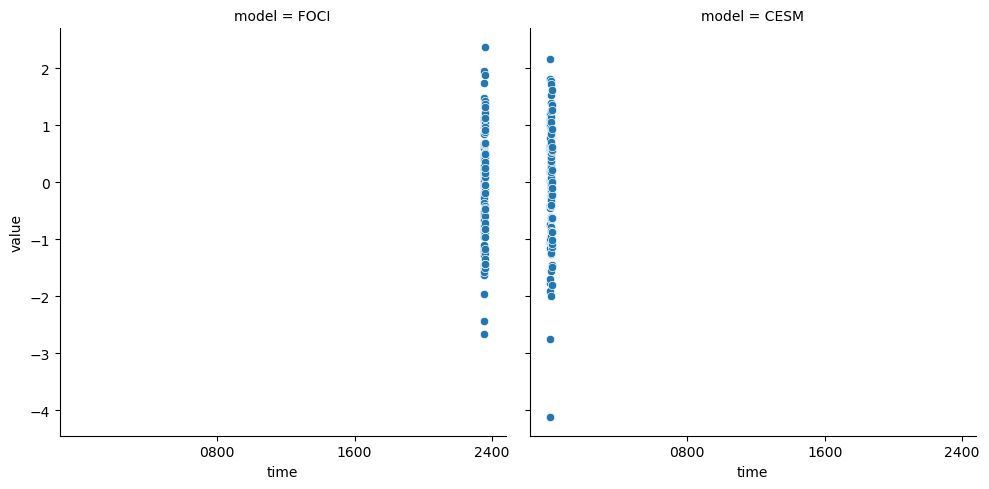

In [27]:
seaborn.relplot(data=temp_df, x='time', col='model', y='value', markers='index')

In [29]:
# Write csv file
temp_df.to_csv('test_output.csv', index=False)

In [30]:
! head test_output.csv

time,model,index,value
2350-02-28 23:52:00,FOCI,SAM,0.6197199
2350-03-31 23:52:00,FOCI,SAM,1.7501345
2350-04-30 23:52:00,FOCI,SAM,1.4807087
2350-05-31 23:52:00,FOCI,SAM,1.0644104
2350-06-30 23:52:00,FOCI,SAM,0.011574998
2350-07-31 23:52:00,FOCI,SAM,-0.60080403
2350-08-31 23:52:00,FOCI,SAM,-0.2217532
2350-09-30 23:52:00,FOCI,SAM,0.97122747
2350-10-31 23:52:00,FOCI,SAM,0.26575142
